# 三章　ニューラルネットワーク

前章ではパーセプトロンについて学びましたが、パーセプトロンについては良い
ニュースと悪いニュースがありました。良いニュースとは、パーセプトロンは複雑な
関数であっても、それを表現できるだけの可能性を秘めているということです。たと
えば、コンピュータが行うような複雑そうな処理であっても、パーセプトロンは（理
論上）表現できることを前章で説明しました。悪いニュースは、重みを設定する作業
――期待する入力と出力を満たすように適切な重みを決める作業――は、今のところ
人の手によって行われているということです。<br>
ニューラルネットワークは、先の悪いニュースを解決するためにあります。具体的
に言うと、適切な重みパラメータをデータから自動で学習できるというのがニューラ
ルネットワークの重要な性質のひとつです。本章では、ニューラルネットワークの概
要を説明し、ニューラルネットワークが識別を行う際の処理に焦点を当てます。

In [1]:
import numpy as np
import matplotlib.pylab as plt

/var/folders/4q/t4qt3lnn6hx6tsgt6yf4j9c80000gp/T/ipykernel_34010/1302578446.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype=np.int)


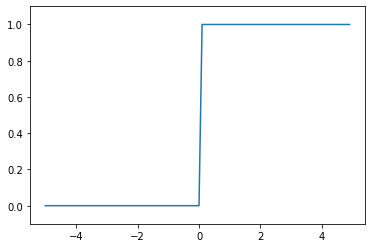

In [2]:
# ステップ関数の実装
def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

ステップ関数は 0 を境にして、出力が 0 から 1(または 1 から 0)へ切り替わります。なお、図3-6 のように階段状に値が切り替わる形から、 ステップ関数は「階段関数」と呼ばれることもあります。

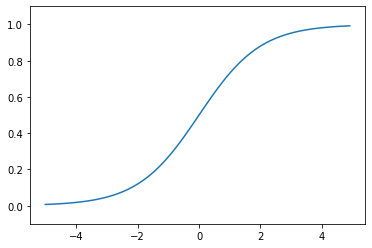

In [8]:
# シグモイド関数の実装
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0 , 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()


```
np.exp(x)
```
x が数のとき、e の x 乗を返す<br>
[np.exp()について stackoverflow](https://ja.stackoverflow.com/questions/37006/np-exp%E3%81%AB%E3%81%A4%E3%81%84%E3%81%A6)

np.arangeは、連番や等差数列を生成する関数<br>
numpy.arange([start, ]stop, [step, ]dtype = None)<br>
[連番や等差数列を生成するnumpy.arange関数の使い方](https://deepage.net/features/numpy-arange.html)

ステップ関数とシグモイド関数の共通点は他にもあります。重要な共通点は、両者 はともに非線形関数であるということです。シグモイド関数は曲線、ステップ関数は 階段のような折れ曲がった直線で表され、ともに非線形な関数に分類されます。<br>
ニューラルネットワークでは、活性化関数に非線形関数を用いる必要があります。 これは言い換えると、活性化関数には線形関数を用いてはならない、ということで す。なぜ線形関数を用いてはならないのでしょうか。それは、線形関数を用いると、 ニューラルネットワークで層を深くすることの意味がなくなってしまうからです。<br>
線形関数の問題点は、どんなに層を深くしても、それと同じことを行う「隠れ層の ないネットワーク」が必ず存在する、という事実に起因します。

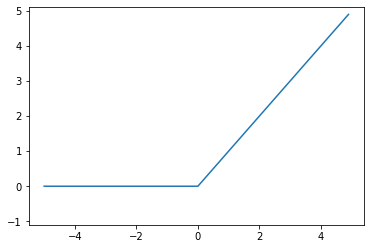

In [12]:
# ReLU 関数
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.1, 5.1)
plt.show()

ここでは、NumPy の maximum という関数を使っています。この maximum は、入 力された値から大きいほうの値を選んで出力する関数です。

In [17]:
a = np.array([1,2,3,4])
np.ndim(a) #配列の次元数を取得

b = np.array([[1,2], [3,4], [5,6]])
np.ndim(b)
b.shape

(3, 2)

In [19]:
a = np.array([[1,2], [3,4]])
b = np.array([[5,6], [7,8]])
np.dot(a,b) # 行列の積

array([[19, 22],
       [43, 50]])

In [21]:
# 対応する次元の要素数を一致させる
x = np.array([1,2])
w = np.array([[1,3,5], [2,4,6]])
y = np.dot(x, w)
print(y)

[ 5 11 17]


In [23]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [24]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [26]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape) 
print(W2.shape) 
print(B2.shape) 

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [28]:
def identity_function(x):
    return x 

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

ここでは、identity_function() という関数を定義して、この関数――これを**「恒等関数」**と言います――を出力層の活性化関数として利用します。恒等 関数は、入力をそのまま出力する関数です。そのため、この例では、わざわざ identity_function() を定義する必要はないのですが、これまでの流れと統一す るため、このような実装にしています。

In [29]:
# 実装まとめ
def init_network():
        network = {}
        network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
        network['b1'] = np.array([0.1, 0.2, 0.3])
        network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
        network['b2'] = np.array([0.1, 0.2])
        network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
        network['b3'] = np.array([0.1, 0.2])
        return network
        
def forward(network, x):
        W1, W2, W3 = network['W1'], network['W2'], network['W3']
        b1, b2, b3 = network['b1'], network['b2'], network['b3']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, W3) + b3
        y = identity_function(a3)
        return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [ 0.31682708  0.69627909]

[0.31682708 0.69627909]


## 3.5出力層の設計
恒等関数→入力をそのまま出力する　入ってきたものに対して何も手を加えずに出力する<br>
ソフトマックス関数→複数の出力値の合計が1.0になるように変換して出力する関数　主に分類問題における出力層の活性化関数として用いられる

In [2]:
# ソフトマックス関数
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

上の softmax 関数の実装は、式 (3.10) を正しく表現できていますが、コンピュー タで計算を行う上では欠陥があります。その欠陥とは、オーバーフローに関する問題 です。ソフトマックス関数の実装では、指数関数の計算を行うことになりますが、そ の際、指数関数の値が容易に大きな値になりえます。たとえば、e10 は 20,000 を超 え、e100 は 0 が 40 個以上も並ぶ大きな値になり、e1000 の結果は無限大を表す inf が返ってきます。そして、このような大きな値どうしで割り算を行うと、数値が“不 安定”な結果になってしまうのです。<br>
コンピュータで「数」を扱う場合、その数値は 4 バイトや 8 バイトといった有 限のデータ幅に収められることになります。これが意味することは、数には有 効桁数があるということ、つまり、表現できる数値の範囲に制限があるという ことです。そのため、とても大きな値は表現できないという問題が発生します。 これをオーバーフローと言い、コンピュータで計算を行う際には(時々)注意 しなければなりません。

In [3]:
# ソフトマックス関数の実装の改善案
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # オーバーフロー対策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [4]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

ここで示したように、ソフトマックス関数の出力は、0 から 1.0 の間の実数になり ます。また、ソフトマックス関数の出力の総和は 1 になります。さて、この総和が 1 になるという性質ですが、これはソフトマックス関数の重要な性質です。この性質の おかげでソフトマックス関数の出力を「確率」として解釈することができます。

● ニューラルネットワークでは、活性化関数としてシグモイド関数や ReLU 関数のような滑らかに変化する関数を利用する。<br>
● NumPy の多次元配列をうまく使うことで、ニューラルネットワークを効 率良く実装することができる。<br>
● 機械学習の問題は、回帰問題と分類問題に大別できる。<br>
● 出力層で使用する活性化関数は、回帰問題では恒等関数、分類問題ではソフトマックス関数を一般的に利用する。<br>
● 分類問題では、出力層のニューロンの数を分類するクラス数に設定する。<br>
● 入力データのまとまりをバッチと言い、バッチ単位で推論処理を行うことで、計算を高速に行うことができる。<br>